In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import keras
import tensorflow as tf

In [2]:
train_dataset=pd.read_csv("gs_train.csv")

In [4]:
train=train_dataset.iloc[:,4:5].values

In [5]:
from sklearn.preprocessing import MinMaxScaler

In [6]:
sc=MinMaxScaler(feature_range=(0,1))
train_scaled=sc.fit_transform(train)

In [10]:
x_train=[]
y_train=[]
for i in range(50,len(train)-2):
    x_train.append(train_scaled[i-50:i,0])
    y_train.append(train_scaled[i])

In [13]:
x_train,y_train=np.array(x_train),np.array(y_train)

In [19]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [20]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [21]:
gs=Sequential()
gs.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1)))
gs.add(Dropout(0.2))
gs.add(LSTM(units=50,return_sequences=True))
gs.add(Dropout(0.2))

gs.add(LSTM(units=50,return_sequences=True))
gs.add(Dropout(0.2))

gs.add(LSTM(units=50))
gs.add(Dropout(0.2))

In [22]:
gs.add(Dense(units=1))
gs.compile(optimizer="adam",
                  loss="mean_squared_error")
gs.fit(x=x_train,y=y_train,epochs=100,batch_size=40)

Epoch 1/100
132/132 [==============================] - 10s 45ms/step - loss: 0.0259
Epoch 2/100
132/132 [==============================] - 7s 50ms/step - loss: 0.0045
Epoch 3/100
132/132 [==============================] - 6s 47ms/step - loss: 0.0031
Epoch 4/100
132/132 [==============================] - 7s 55ms/step - loss: 0.0031
Epoch 5/100
132/132 [==============================] - 6s 45ms/step - loss: 0.0027
Epoch 6/100
132/132 [==============================] - 7s 53ms/step - loss: 0.0023
Epoch 7/100
132/132 [==============================] - 7s 50ms/step - loss: 0.0024: 0s - loss:
Epoch 8/100
132/132 [==============================] - 6s 49ms/step - loss: 0.0022
Epoch 9/100
132/132 [==============================] - 6s 46ms/step - loss: 0.0022
Epoch 10/100
132/132 [==============================] - 7s 51ms/step - loss: 0.0018
Epoch 11/100
132/132 [==============================] - 7s 50ms/step - loss: 0.0018
Epoch 12/100
132/132 [==============================] - 6s 44ms/step - l

132/132 [==============================] - 6s 44ms/step - loss: 6.2827e-04
Epoch 95/100
132/132 [==============================] - 7s 51ms/step - loss: 6.3129e-04
Epoch 96/100
132/132 [==============================] - 6s 46ms/step - loss: 6.4141e-04
Epoch 97/100
132/132 [==============================] - 11s 81ms/step - loss: 6.8231e-04
Epoch 98/100
132/132 [==============================] - 6s 45ms/step - loss: 6.6084e-04
Epoch 99/100
132/132 [==============================] - 6s 44ms/step - loss: 6.6054e-04: 0s - loss: 6.6089e-
Epoch 100/100
132/132 [==============================] - 7s 56ms/step - loss: 6.3905e-04


In [114]:
gs.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 50, 50)            10400     
_________________________________________________________________
dropout_4 (Dropout)          (None, 50, 50)            0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 50, 50)            20200     
_________________________________________________________________
dropout_5 (Dropout)          (None, 50, 50)            0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 50, 50)            20200     
_________________________________________________________________
dropout_6 (Dropout)          (None, 50, 50)            0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 50)               

In [24]:
test_dataset=pd.read_csv("gs_test.csv")
test=test_dataset.iloc[:,4:5].values
total_data=pd.concat((train_dataset["close"],test_dataset["close"]),axis=0)

In [33]:
inputs=total_data[len(total_data)-len(test)-50:].values
inputs=inputs.reshape(-1,1)
print(inputs.shape,type(inputs))
inputs=sc.fit_transform(inputs)

(325, 1) <class 'numpy.ndarray'>


In [27]:
x_test=[]
for i in range(50,len(test)):
    x_test.append(inputs[i-50:i,0])
x_test=np.array(x_test)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
predicted_stock=gs.predict(x_test)
predicted_stock_price=sc.inverse_transform(predicted_stock)

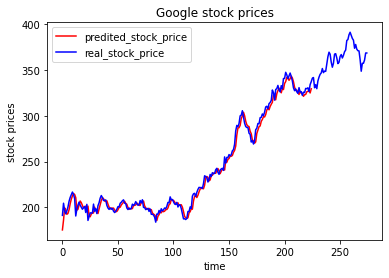

In [28]:
plt.plot(predicted_stock_price,color="red",label="predited_stock_price")
plt.plot(test,color="blue",label="real_stock_price")
plt.title("Google stock prices")
plt.xlabel("time")
plt.ylabel("stock prices")
plt.legend()
plt.show()

In [109]:
days = 60

res = []
new_d =list(total_data[-51:].values)

for i in range(days):
    
    new_x =np.array(new_d[-50:])
    new_x = new_x.reshape(-1,1)
    new_t = sc.fit_transform(new_x)
    new_test = [new_t]
    new_test = np.array(new_test)
    new_test = np.reshape(new_test,(new_test.shape[0],new_test.shape[1],1))
    pre = gs.predict(new_test)
    pre = sc.inverse_transform(pre)
    res.append(pre)
    new_d+=[pre]
    
    

c:\users\hp\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  
c:\users\hp\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  
c:\users\hp\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when c

c:\users\hp\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  
c:\users\hp\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  
c:\users\hp\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when c

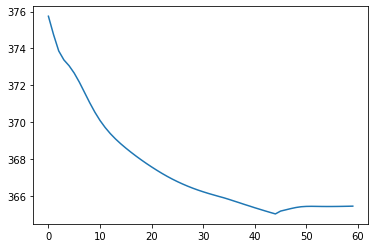

In [113]:
n = [i[0] for i in res] #next 60 days plot
plt.plot(n)

In [111]:
real_y = [i[0] for i in test[-50:]]     
real_x = list(range(len(real_y)))

complete_y = real_y + [i[0] for i in n]
complete_x = list(range(len(complete_y)))

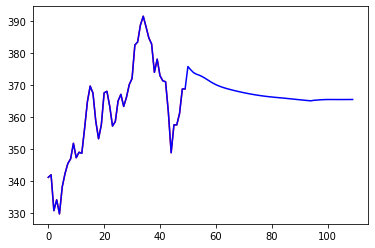

In [112]:
plt.plot(real_x,real_y,color = 'red')
plt.plot(complete_x,complete_y,color ='blue')
